<a href="https://colab.research.google.com/github/PrasadReddyGaddam/PYTHON/blob/master/09_07_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

- **Load MNSIT  dataset**

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
# load_data -- return value is two tuple train,test
(train_digits,train_labels),(test_digits,test_labels) = load_data()
print(train_digits.shape)

(60000, 28, 28)


- there are 60000 images in training data
28*28

In [4]:
print(test_digits.shape)

(10000, 28, 28)


In [5]:
type(train_labels)

numpy.ndarray

In [6]:
import pandas as pd
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [7]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

EDA

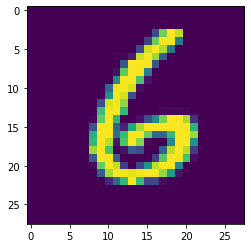

In [8]:
plt.imshow(train_digits[6000])

Text(0.5, 1.0, 'Digit4')

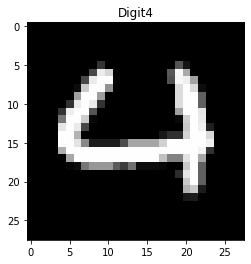

In [9]:
plt.imshow(train_digits[60],cmap="gray")
plt.title("Digit"+str(train_labels[60]))

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

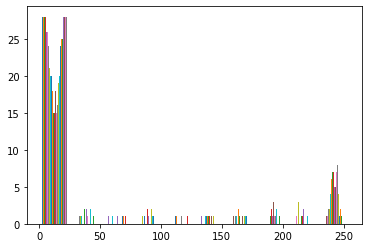

In [10]:
plt.hist(train_digits[0])

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

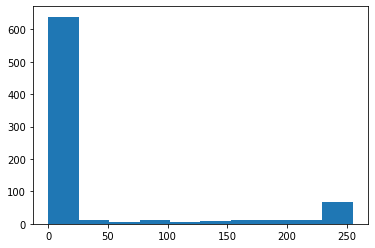

In [11]:
plt.hist(train_digits[0].flat) #1d array to be passed

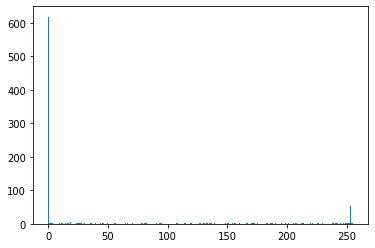

In [12]:
plt.hist(train_digits[0].flat,bins=255)
plt.show()

(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

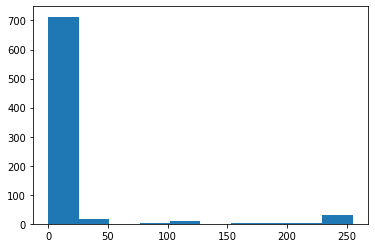

In [13]:
plt.hist(train_digits[14].flat)

In [14]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [15]:
samples = np.random.randint(train_digits.shape[0],size=16)
samples

array([41255, 31904,  5524, 32286, 32604, 12099, 22312, 17279, 29573,
       45830, 37273, 52334, 35586, 40054, 32571, 24688])

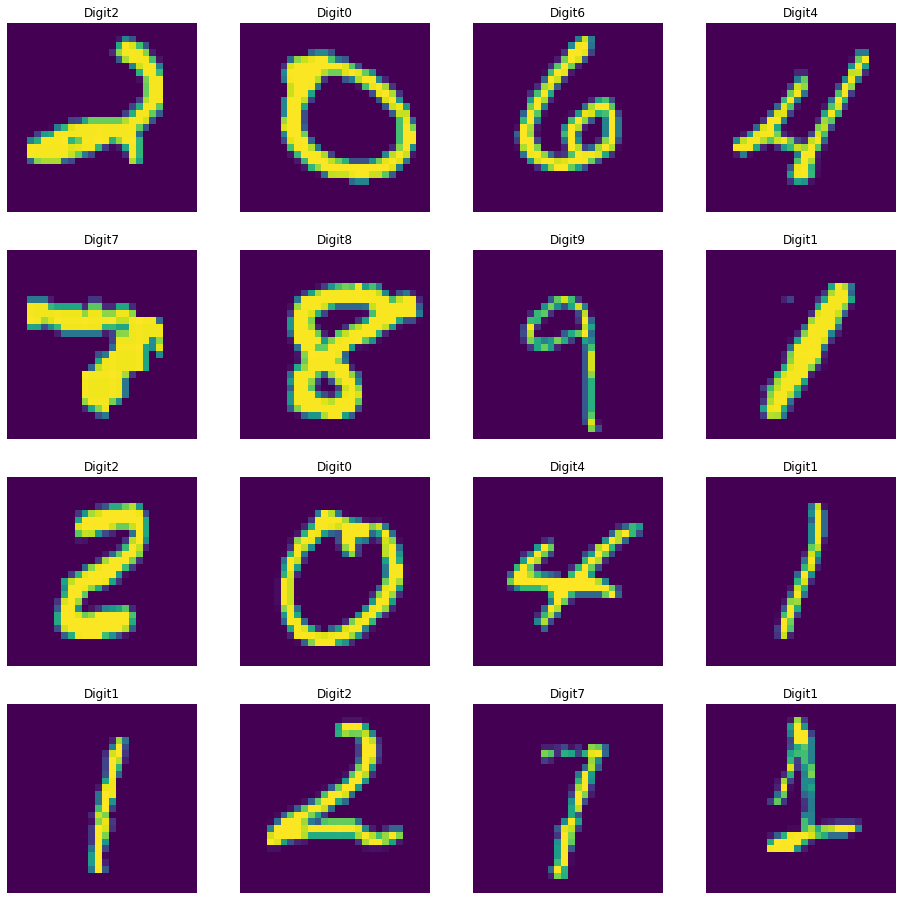

In [16]:
plt.figure(figsize=(16,16))
j = 1
for  i in samples:
  plt.subplot(4,4,j)
  #plt.imshow(train_digits[i],cmap="gray")
  plt.imshow(train_digits[i])
  plt.title("Digit"+str(train_labels[i]))
  plt.axis("off")
  j +=1

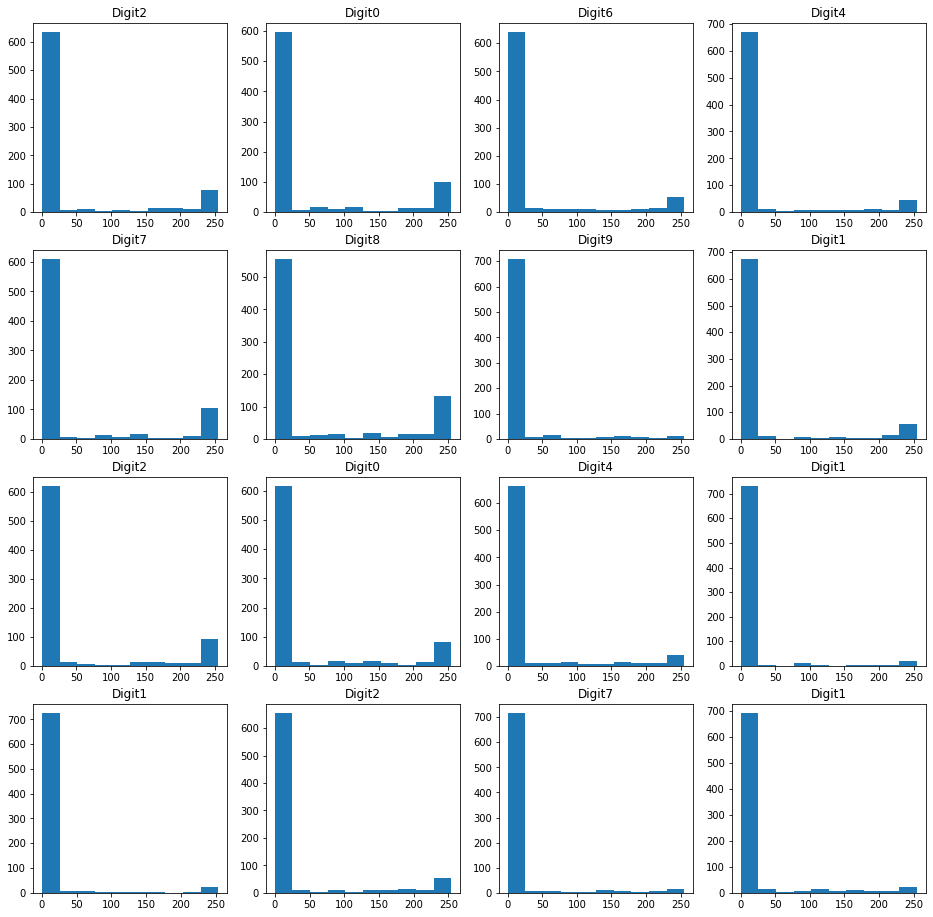

In [17]:
plt.figure(figsize=(16,16))
j = 1
for  i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("Digit"+str(train_labels[i]))
  #plt.axis("off")
  j +=1

## Preprocessing

### Scaling

In [18]:
train_digits_sc  = train_digits/255.0
test_digits_sc = test_digits/255.0

In [19]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
#to convert into labels
from keras.utils import to_categorical

In [21]:
train_labels_cat = to_categorical(train_labels)

In [22]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
test_labels_cat = to_categorical(test_labels)

In [24]:
test_labels_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

- Split the train data to train ad validation

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


##  Build and train model

### Build model
- We need to take 1d array as input for Dense layer
- How many hidden layers need to be added
- How many neurons in  each hidden layer?
- What is activation function for hidden layer?
- How many neurons to be taken in output layer?
- What is activation functin for output layer?

In [26]:
#import methods required
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [27]:
# We are creating base  model
model = Sequential()
# first layer(only first layer takes input shape)
# Since it is seq procedur o/p of one layer is i/p of next layer
model.add(Flatten(input_shape=(28,28)))
# 784 pixel value as input to dense.128 neuron in the layer
model.add(Dense(128,activation="relu")) #784*128+128
model.add(Dense(128,activation="relu"))  #128*128+128
model.add(Dense(64,activation="relu"))
model.add(Dense(256,activation="relu"))
# Final layer
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

### Compile the model
- What is the loss functin?
- What is the optimizer?
- What are the Metrics used?

In [28]:
model.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])

##Train model

In [29]:
history = model.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 125us/step - loss: 0.2478 - accuracy: 0.9242 - val_loss: 0.1618 - val_accuracy: 0.9510
Epoch 2/10
54000/54000 [==============================] - 7s 123us/step - loss: 0.1093 - accuracy: 0.9666 - val_loss: 0.1232 - val_accuracy: 0.9633
Epoch 3/10
54000/54000 [==============================] - 7s 124us/step - loss: 0.0828 - accuracy: 0.9746 - val_loss: 0.1033 - val_accuracy: 0.9700
Epoch 4/10
54000/54000 [==============================] - 7s 121us/step - loss: 0.0634 - accuracy: 0.9804 - val_loss: 0.1124 - val_accuracy: 0.9713
Epoch 5/10
54000/54000 [==============================] - 7s 121us/step - loss: 0.0526 - accuracy: 0.9834 - val_loss: 0.1039 - val_accuracy: 0.9727
Epoch 6/10
54000/54000 [==============================] - 7s 124us/step - loss: 0.0460 - accuracy: 0.9853 - val_loss: 0.1178 - val_accuracy: 0.9727
Epoch 7/10
54000/54000 [==============================] - 7s 12

## Evaluating model 

In [30]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 29us/step


[0.1128699624111021, 0.9750999808311462]

In [31]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))
#model.predict(test_digits_sc[[0]])

array([[1.4449428e-13, 1.7355172e-12, 1.2561086e-10, 5.1707882e-10,
        3.3494580e-13, 6.0440524e-14, 3.6709107e-19, 1.0000000e+00,
        2.5066765e-13, 1.2891367e-08]], dtype=float32)

In [32]:
model.predict(test_digits_sc[:10]) # for 10 imgs

array([[1.44494835e-13, 1.73551722e-12, 1.25611091e-10, 5.17079823e-10,
        3.34946426e-13, 6.04406390e-14, 3.67092494e-19, 1.00000000e+00,
        2.50669114e-13, 1.28914168e-08],
       [5.81978855e-13, 6.90895945e-08, 9.99999881e-01, 9.01630215e-10,
        5.24382759e-10, 6.92133070e-12, 4.97369368e-10, 1.55816036e-08,
        1.67155600e-09, 2.75154121e-15],
       [1.14025118e-08, 9.99016643e-01, 1.20431672e-04, 5.14980138e-06,
        1.49851840e-05, 1.44465985e-05, 1.38354044e-05, 6.45276916e-04,
        1.69078747e-04, 1.26480415e-07],
       [1.00000000e+00, 3.39919629e-12, 7.62822236e-11, 3.50700317e-13,
        9.73879137e-12, 7.33525437e-13, 4.29050490e-10, 1.05752100e-11,
        1.10233211e-10, 5.11318626e-11],
       [5.06370057e-10, 1.22250043e-09, 2.02671700e-07, 2.15594686e-12,
        9.99971271e-01, 6.00850392e-09, 3.50501885e-08, 1.38344793e-08,
        8.36042791e-09, 2.84685884e-05],
       [3.54178254e-12, 9.99981999e-01, 5.24701306e-07, 1.05386100e-08,
   

In [33]:
model.predict_classes(test_digits_sc[[0]])

array([7])

In [34]:
model.predict_proba(test_digits_sc[[0]])

array([[1.4449428e-13, 1.7355172e-12, 1.2561086e-10, 5.1707882e-10,
        3.3494580e-13, 6.0440524e-14, 3.6709107e-19, 1.0000000e+00,
        2.5066765e-13, 1.2891367e-08]], dtype=float32)

In [35]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [36]:
history.history

{'accuracy': [0.9242037,
  0.9665926,
  0.9746482,
  0.98037034,
  0.9833889,
  0.9853333,
  0.98775923,
  0.9901111,
  0.9900926,
  0.9917222],
 'loss': [0.24782348882600114,
  0.1093015239139398,
  0.08278398318971611,
  0.06344403801441917,
  0.052607640262399974,
  0.04597446210812605,
  0.04064337618685116,
  0.033739718072250846,
  0.031740275858413686,
  0.025982158886678885],
 'val_accuracy': [0.9509999752044678,
  0.9633333086967468,
  0.9700000286102295,
  0.9713333249092102,
  0.9726666808128357,
  0.9726666808128357,
  0.9783333539962769,
  0.9763333201408386,
  0.9748333096504211,
  0.9731666445732117],
 'val_loss': [0.16176274346311886,
  0.12324384292960167,
  0.10330200275219976,
  0.11241717433805266,
  0.10392819826553265,
  0.11784913071182868,
  0.07994632773807583,
  0.10242628668283578,
  0.10578642603832608,
  0.12393359203425158]}

In [37]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

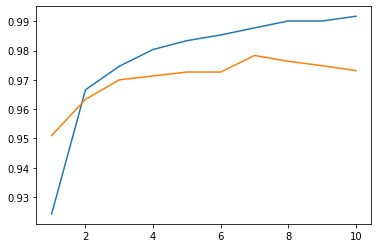

In [38]:
plt.plot(range(1,11),history.history["accuracy"])
plt.plot(range(1,11),history.history["val_accuracy"])
  